# COG260 Final Project
## Group: Victor Cho & Tony Niu
## Date: Monday, December 14, 2020
## Personality Prediction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.classify import NaiveBayesClassifier

In [6]:
# import dataset
df = pd.read_csv ('mbti_1.csv')

df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [7]:
# number of users who identify as a specific personality
df.groupby('type').agg({'type':'count'})

,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


In [9]:
# Check for null values
df.isnull().any()


type     False
posts    False
dtype: bool

In [10]:
# Check data shape
df.shape

(8675, 2)

In [11]:
# Export the posts in the field
df.iloc[0,1].split('|||')

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

In [13]:
# Find the number of posts 
len(df.iloc[1,1].split('|||'))

50

In [15]:
# Find unique values from the personality column
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [16]:
# The total number of posts for each type
total = df.groupby(['type']).count()*50
total

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Total posts for each personality type')

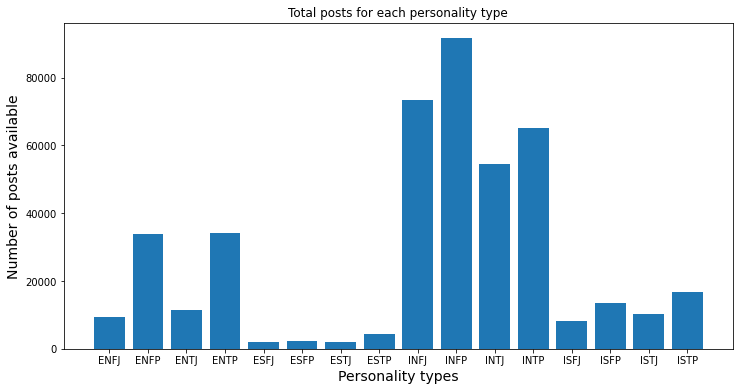

In [17]:
# Visualise through histogram
plt.figure(figsize = (12,6))

plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

In [21]:
# Segrating all the posts by their personality types and creating a new dataframe to store all this in
all_posts= pd.DataFrame()
for j in types:
    temp1 = df[df['type']==j]['posts']
    temp2 = []
    for i in temp1:
        temp2+=i.split('|||')
    temp3 = pd.Series(temp2)
    all_posts[j] = temp3

all_posts['ENFP']

0       'He doesn't want to go on the trip without me,...
1       I'm still completely in AWE and I'm AMAZED tha...
2       Thanks, everyone. I'm struggling with being se...
3       My husband works an extra job each year to pay...
4       He said that it's not like he's asking me to d...
                              ...                        
9283    'Very true.  The thing is to recognize and ove...
9284    i'm not real sure it's a great idea to date un...
9285    Watch some comedies, kids are joyful and make ...
9286    Meditation is great! Read up on TFT and EFT ta...
9287    2 Physical Touch   7 Quality Time   7 Words of...
Name: ENFP, Length: 9288, dtype: object